In [36]:
import glob
import csv
import math
import collections
import os.path
from sets import Set
import sys


import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=2)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import scipy  
import scikits.bootstrap as bootstrap
#from scipy import stats
import scipy.stats as ss
import matplotlib.gridspec as gridspec
#from IPython.display import Image

from PIL import Image
from IPython.display import Image as ipyImage

import prettyplotlib as ppl
from matplotlib.colors import LogNorm
from prettyplotlib import brewer2mpl


#%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)
%rehashx

#import mpld3
#mpld3.enable_notebook()

pd.__version__

u'0.20.3'

In [37]:
data_path = ""
scripts_path = ""
analysis_directory = ""
data_name = ""

In [38]:
def add_treatment(dic, series, name, seed, longname=None, shortid=None, 
                  factors={}, skip_seeds=None,
                  location=None, filename=None):
    shortlabel = name
    if series:
        shortlabel = series + "_" + name
        
    if not longname:
        longname = "\n".join( name.split("_") )
                        
    if not location:        
        location = series + "_" + name + "_" + seed
    
    if skip_seeds == None:
        skip_seeds = []
    
    dic[shortlabel] = {'longlabel': longname, 'shortlabel': shortlabel, 'series': series, 'id': shortid,
                  'dir': location, 'filename': filename, 'factors': factors, 'skip': skip_seeds} 

In [4]:
data_name = "CA_GrazingHypothesis_LongTermEvolution"
data_number = "CA-1"

treatments = collections.OrderedDict()
add_treatment(treatments, series="CA-1", seed="104", name="Z1_HGT_B0.0", shortid="Z1",
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="Z2_noHGT_B0.0",  shortid="Z2",
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z3_noHGT_B0.0_CE", shortid="Z3", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z4_noHGT_B0.0_CEq", shortid="Z4", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False", 'Exp': 'B'})

add_treatment(treatments, series="CA-1", seed="104", name="Z5_noHGT_B0.0_CE_benign", shortid="Z5", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z6_noHGT_B0.0_CEq_benign", shortid="Z6", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False"})

add_treatment(treatments, series="CA-1", seed="104", name="Z7_HGT_B0.0_nologic77", shortid="Z7", 
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="Z8_noHGT_B0.0_nologic77", shortid="Z8", 
              factors={'Bonus':"B0.0", 'Env':"Static", 'Quiesce': "True", 'Exp': 'B'})



add_treatment(treatments, series="CA-1", seed="104", name="A1_HGT_B0.0_CE", shortid="A1", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="A5_HGT_B0.0_CEq", shortid="A5", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})

add_treatment(treatments, series="CA-1", seed="104", name="A2_HGT_B0.8", shortid="A2", 
              factors={'Bonus':"B0.8", 'Env':"Static", 'Quiesce': "True", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="A3_HGT_B1.6", shortid="A3", 
              factors={'Bonus':"B1.6", 'Env':"Static", 'Quiesce': "True", 'Exp': 'A'})

add_treatment(treatments, series="CA-1", seed="104", name="A4_HGT_B0.8_CE", shortid="A4", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "False", 'Exp': 'A'})
add_treatment(treatments, series="CA-1", seed="104", name="A6_HGT_B0.8_CEq", shortid="A6", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})


add_treatment(treatments, series="CA-1", seed="104", name="B1_HGT_B0.0_CE_benign", shortid="B1", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "False", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="B5_HGT_B0.0_CEq_benign", shortid="B5", 
              factors={'Bonus':"B0.0", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})

add_treatment(treatments, series="CA-1", seed="104", name="B4_HGT_B0.8_CE_benign", shortid="B4", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "False", 'Exp': 'B'})
add_treatment(treatments, series="CA-1", seed="104", name="B6_HGT_B0.8_CEq_benign", shortid="B6", 
              factors={'Bonus':"B0.8", 'Env':"CE", 'Quiesce': "True", 'Exp': 'B'})


#print treatments

In [5]:
def setup_analysis_path(treatments, 
    base_path="/Core/home/rosiec/__research/HGT/raw_data/", 
    scripts="~/Dropbox/School_Docs/Research/research_scripts/", 
                        verbose=False):
    
    global analysis_directory
    analysis_directory = "analysis"
    
    ## generated
    data_directory = "_".join(data_name.split(" "))
    global data_path
    data_path = base_path + data_directory
    analysis_path = data_path + "/" + analysis_directory
    global scripts_path
    scripts_path = scripts
    
#    global scripts_path
#    scripts_path = scripts_path

    if verbose:
        print "base_path:", base_path
        print "scripts_path:", scripts_path
        print "data_path:",data_path
        print "analysis_path", analysis_path
        print
        print "Treatments:"
        print treatments.keys()
        print
        print "Values:"
        for val in treatments.values():
            print val

In [6]:
def prepare_analysis_directories(treatments, skipchecks=False, cleanup=True, verbose=False, length=200000):

    if verbose:
        print data_path
    %cd {data_path}
    !mkdir incomplete
    #if verbose:
    #    !pwd
    #    %pwd
    #%mkdir incomplete
    if verbose:
        !pwd
    #!ls
    
    if not skipchecks:
        bleh = []
        for t in treatments:
            print treatments[t]['dir']
            datafiles = glob.glob(data_path+'/'+treatments[t]['dir']+'*')
            for item in datafiles:

                filepath = item +"/data/count.dat"
                if os.path.isfile(filepath):
                    line = !tail -n 1 $filepath
                elif os.path.isfile(filepath+".gz"):
                    filepath = filepath+".gz"
                    line = !zcat $filepath | tail -n 1
                else:
                    if verbose:
                        print "count.dat[.gz] not found."
                    line = ""

                filepath = item +"/data/average.dat"
                if not os.path.isfile(filepath) and not os.path.isfile(filepath+".gz"):
                    if verbose:
                        print "average.dat[.gz] not found."
                    line = ""



                #print filepath
                #bleh = line
                #print line
                #line = line.split(' ')[0]
                #print line
                if len(line) == 0 or line[0].split(' ')[0] != str(length):
                    if verbose:
                        print "Incomplete", item, line
                    if cleanup:
                        !mv $item incomplete/

    %mkdir {analysis_directory}
    %cd {analysis_directory}
    if verbose:
        %pwd

    for t in treatments:
        print
        print t, ": " , len(glob.glob(data_path+'/'+treatments[t]['dir']+'*'))
        for v in treatments[t]:
            print "  ",v,": ", treatments[t][v]
            


In [7]:
pwd

u'/Core/home/rosiec/Dropbox/School_Docs/Dissertation/ipython_notebooks/Chapter_5_-_LongTerm_Evo'

In [8]:
## Call the init methods 
setup_analysis_path(treatments, 
    base_path="/Core/home/rosiec/__research/HGT/raw_data/FinalData/", 
                    verbose=True)
prepare_analysis_directories(treatments, skipchecks=False, 
    cleanup=True, verbose=False, length=400000)

base_path: /Core/home/rosiec/__research/HGT/raw_data/FinalData/
scripts_path: ~/Dropbox/School_Docs/Research/research_scripts/
data_path: /Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution
analysis_path /Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution/analysis

Treatments:
['CA-1_Z1_HGT_B0.0', 'CA-1_Z2_noHGT_B0.0', 'CA-1_Z3_noHGT_B0.0_CE', 'CA-1_Z4_noHGT_B0.0_CEq', 'CA-1_Z5_noHGT_B0.0_CE_benign', 'CA-1_Z6_noHGT_B0.0_CEq_benign', 'CA-1_Z7_HGT_B0.0_nologic77', 'CA-1_Z8_noHGT_B0.0_nologic77', 'CA-1_A1_HGT_B0.0_CE', 'CA-1_A5_HGT_B0.0_CEq', 'CA-1_A2_HGT_B0.8', 'CA-1_A3_HGT_B1.6', 'CA-1_A4_HGT_B0.8_CE', 'CA-1_A6_HGT_B0.8_CEq', 'CA-1_B1_HGT_B0.0_CE_benign', 'CA-1_B5_HGT_B0.0_CEq_benign', 'CA-1_B4_HGT_B0.8_CE_benign', 'CA-1_B6_HGT_B0.8_CEq_benign']

Values:
{'shortlabel': 'CA-1_Z1_HGT_B0.0', 'skip': [], 'longlabel': 'Z1\nHGT\nB0.0', 'factors': {'Bonus': 'B0.0', 'Quiesce': 'True', 'Exp': 'A', 'Env': 'Static'}, 'se

In [9]:
def test_data_accessibility(treatments):
    !pwd
    direct = treatments[treatments.keys()[0]]['dir']
    print "regular cat"
    %cat ../{direct}001/data/log_average.dat | head -n 20
    print
    print "zcat"
    %zcat ../{direct}001/data/log_average.dat* | head -n 20
    
test_data_accessibility(treatments)

/Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution/analysis
regular cat
cat: ../CA-1_Z1_HGT_B0.0_104001/data/log_average.dat: No such file or directory

zcat
# Avida Fitness Data
# Sun Sep 17 15:03:39 2017
#  1: Update
#  2: Fitness
#  3: Fitness STE
#  4: Fitness Variance
#  5: Log Fitness
#  6: Log Fitness STE
#  7: Log Fitness Variance

0 0 0 0 -inf -nan -nan 
100 0.24822 0.000144608 7.52814e-05 -1.39423 0.000710771 0.0018187 
200 0.248201 0.000137715 6.8276e-05 -1.3942 0.000650761 0.00152456 
300 0.247937 0.000177811 0.000113821 -1.39596 0.000984501 0.00348927 
400 0.248043 0.000152227 8.34235e-05 -1.39501 0.000732263 0.00193035 
500 0.24777 0.000173827 0.000108777 -1.39639 0.000849232 0.0025963 
600 0.247465 0.000188502 0.000127883 -1.39784 0.000928183 0.00310063 
700 0.247889 0.000170936 0.000105131 -1.39586 0.000827008 0.00246082 
800 0.24805 0.000162786 9.53972e-05 -1.39512 0.000799292 0.00229993 
900 0.248163 0.000175814 0.000111278 -1.3

In [10]:
def test_scripts_accessibilty(treatments):
    import sys
    sys.path.append({scripts_path})
    %run {scripts_path}/quickplot.py --help
    
test_scripts_accessibilty(treatments)

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

### Helper Functions

#### Dataset Manipulation (Grab/Thin)

In [11]:
def grab_set(ts, factor=None, series=None):
    if not factor and not series:
        return ts
    if series and factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               (factor in ts[t]['factors'].values() and 
               ts[t]['series'] == series)]
        
        #print "HI", series, factor
        #print thing
        
    elif factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               factor in ts[t]['factors'].values()]
    elif series:
        thing = [ts[t]['shortlabel'] for t in ts if 
               ts[t]['series'] == series]
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_grab_set(treatments):

    print "Subsetting"
    print treatments.keys()
    print
    print "Subset, selecting on series AC-1"
    print grab_set(series="AC-1", ts=treatments).keys()

In [12]:
## THIN SETS
def thin_set(ts, factor=None, series=None):

    thing = ts.keys()
    
    if factor:
        for t in ts.keys():
            if factor in ts[t]['factors'].values():
                thing.remove(t)
                
    if series:
        for t in ts.keys():
            if series == ts[t]['series']:
                thing.remove(t)
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_thin_set(treatments):
    print
    print "Thinning Set"
    print treatments.keys()
    thingy = grab_set(series="AC-2", factor="Homol", ts=treatments)
    print
    print "Subset selecting by HOMOL factor"
    print thingy.keys()
    print
    print "Thinned by removing MRI factor"
    print thin_set(factor="MRI", ts=thingy).keys()

In [13]:
def factorset(treatments):
    factorset = None
    for t in ac2_set:
        if not factorset:
            factorset = set(treatments[t]['factors'].keys())
        factorset &= set(treatments[t]['factors'].keys())
    return list(factorset)

In [14]:
def matchingcolumns(dataset1, dataset2):
    return list( set(dataset1.columns) & set(dataset2.columns) )
    

# HGT Use - Timeseries

In [16]:
%pwd

u'/Core/home/rosiec/__research/HGT/raw_data/FinalData/CA_GrazingHypothesis_LongTermEvolution/analysis'

In [19]:
%pwd 

def generate_data(use_pickled=False):
    picklename = "hgt_use_timeseries.pd.pickle"

    ## check for pickling!
    if use_pickled and os.path.exists(picklename):
        hgt_uptakes = pd.read_pickle(picklename)
        return hgt_uptakes
        
    
    
    hgt_uptakes = []
    tct = 0
    for t in treatments:  
        tct += 1
        print t

        dfs = []

        for i in range(1,51):

            bit = str(i).zfill(2) ## runs from 01 to 50
            globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/hgt.dat*'
            dfiles = sorted(glob.glob(globstring))

            for item in dfiles:
                sys.stdout.write('.')

                df = pd.read_csv(item, header=None, comment="#", 
                                  delimiter=' ', usecols=[0,6],
                                  skipinitialspace=True, 
                                  names=['update', 'uptakes'] 
                                )


                df['id'] = [ treatments[t]['id'] ] * len(df)
                df['treatment'] = [t] * len(df)
                df['label'] = [ treatments[t]['longlabel'] ] * len(df)
                df['replicate'] = [i] * len(df)



                dfs.append( df )

        intermediate = pd.concat(dfs)


        hgt_uptakes.append(intermediate)

        print "  done"

    hgt_uptakes = pd.concat(hgt_uptakes)

    
    ## if we generate the data, pickle it
    hgt_uptakes.to_pickle(picklename)

    return hgt_uptakes

hgt_uptakes = generate_data(use_pickled=True)  
print hgt_uptakes.describe()
print hgt_uptakes.head()

             update       uptakes     replicate
count  3.260815e+06  3.260815e+06  3.260815e+06
mean   2.000000e+05  7.747403e+04  2.528834e+01
std    1.154989e+05  5.850838e+04  1.443570e+01
min    0.000000e+00  0.000000e+00  1.000000e+00
25%    1.000000e+05  2.056200e+04  1.300000e+01
50%    2.000000e+05  7.389500e+04  2.500000e+01
75%    3.000000e+05  1.244580e+05  3.800000e+01
max    4.000000e+05  9.252190e+05  5.000000e+01
   update  uptakes  id         treatment          label  replicate
0       0        0  Z1  CA-1_Z1_HGT_B0.0  Z1\nHGT\nB0.0          1
1     100      354  Z1  CA-1_Z1_HGT_B0.0  Z1\nHGT\nB0.0          1
2     200      645  Z1  CA-1_Z1_HGT_B0.0  Z1\nHGT\nB0.0          1
3     300      940  Z1  CA-1_Z1_HGT_B0.0  Z1\nHGT\nB0.0          1
4     400     1016  Z1  CA-1_Z1_HGT_B0.0  Z1\nHGT\nB0.0          1


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/usr/

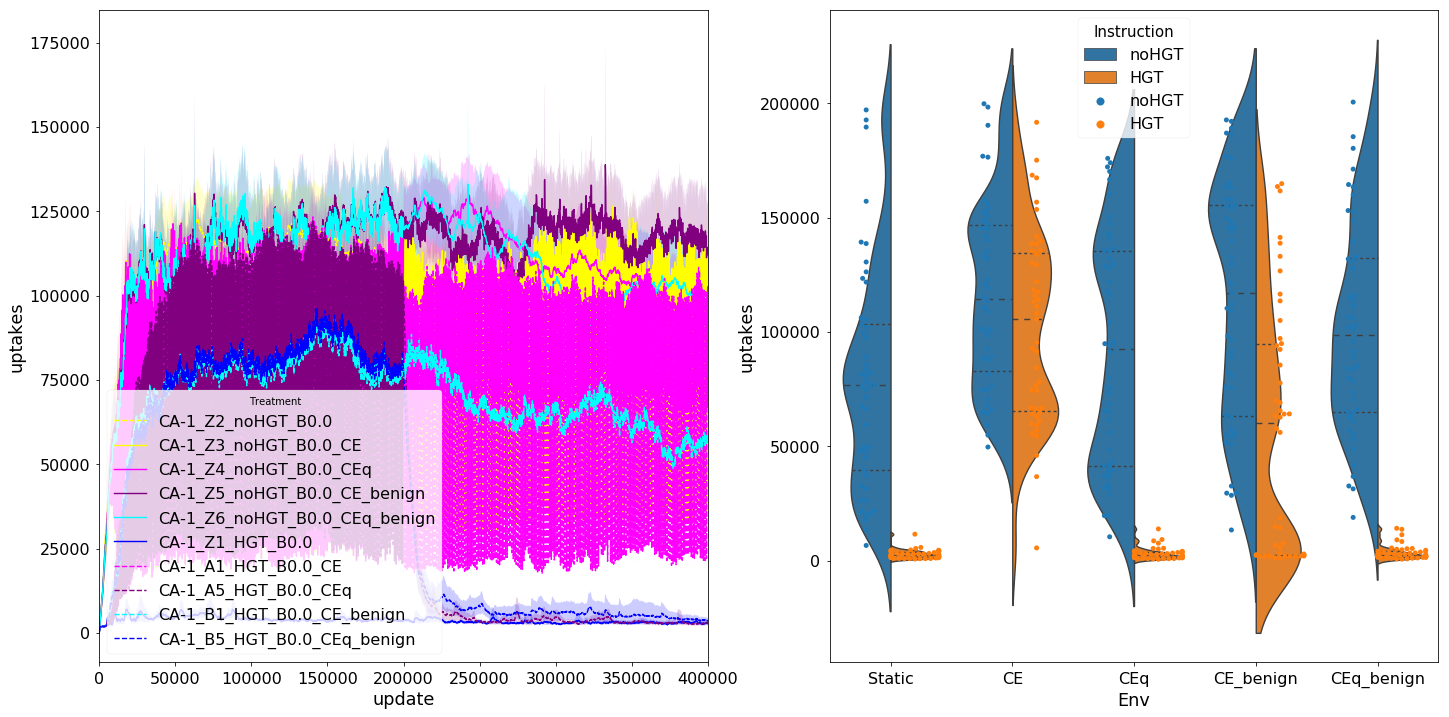

In [18]:
# Factor HGT vs noHGT
# Environment Type Sweep

#print data

data = hgt_uptakes

partA = data [(data['id'] == 'Z2') |
            (data['id'] == "Z3") | (data['id'] == 'Z4') |
            (data['id'] == "Z5") | (data['id'] == 'Z6') ]
partA['Instruction'] = ['noHGT'] * len(partA)

partB = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
partB['Instruction'] = ['HGT'] * len(partB)

part = pd.concat([partA, partB])
#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - HGT Fragment Uptake" + "\nFactor: HGT vs NoHGT" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="uptakes",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')



plt.subplot(122)
piece = part.loc[part['update'] == 400000]

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

sns.violinplot(x="Env", y="uptakes", hue='Instruction', 
               data=piece, 
               dodge=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Env", y="uptakes", hue='Instruction', 
              data=piece, 
              dodge=True,
                 )

# ax.legend(title='Treatment')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

(0, 300000)

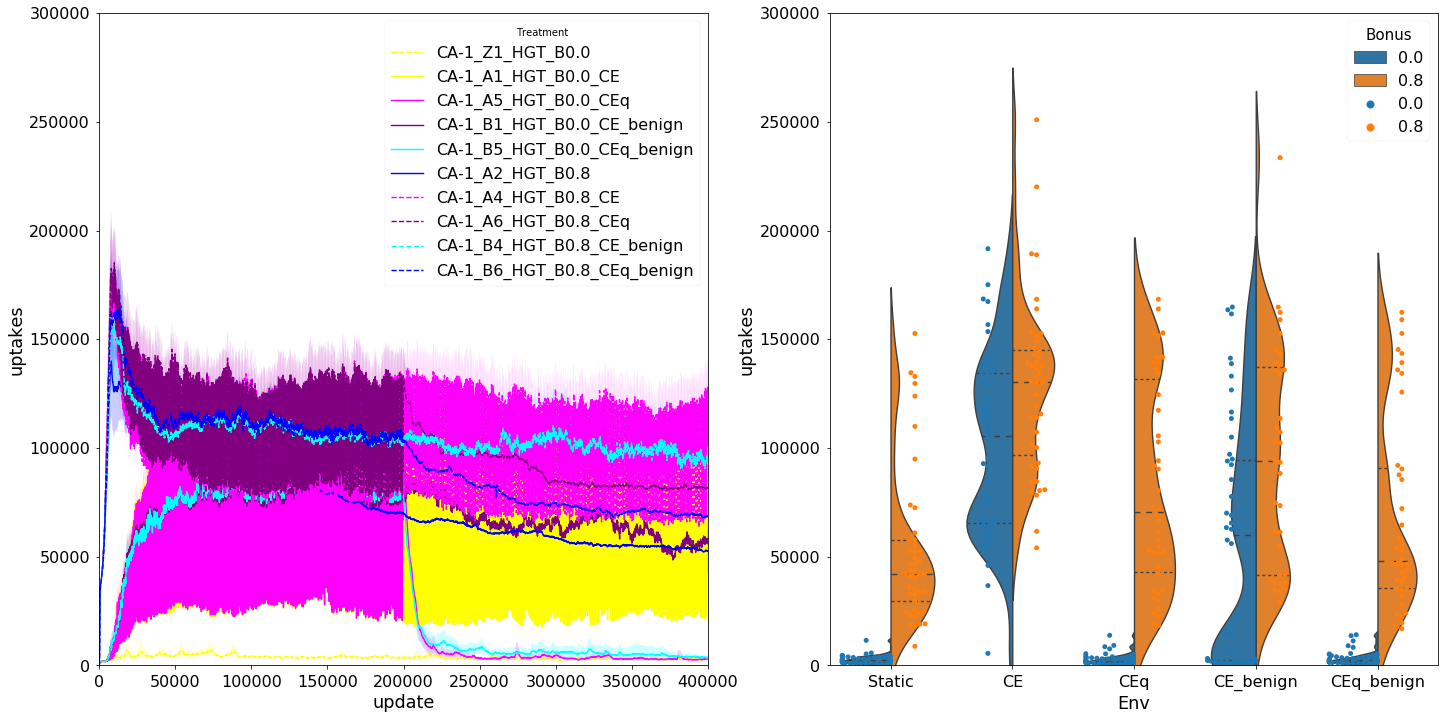

In [22]:
# Factor B0 vs B0.8
# Environment Type Sweep

#print data

data = hgt_uptakes

B0 = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
B0['Bonus'] = ['0.0'] * len(B0)

B08 = data [(data['id'] == "A2") |
            (data['id'] == "A4") | (data['id'] == 'A6') |
            (data['id'] == "B4") | (data['id'] == 'B6')]
B08['Bonus'] = ['0.8'] * len(B08)
B0_B08 = pd.concat([B0, B08])

part = B0_B08
#print part

colors = ['yellow', 'yellow', 
          'magenta', 'purple', 'cyan', 'blue',
         'magenta', 'purple', 'cyan', 'blue']
linestyles = ['--', '-', '-', '-', '-', '-', 
              '--', '--', '--', '--']

plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - HGT Fragment Uptake" + "\nFactor: Bonus 0.0 vs Bonus 0.8" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="uptakes",
                unit="replicate", 
                condition="treatment",
                data=part,
                color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')
ax.set_ylim([0,300000])



plt.subplot(122)
piece = part.loc[part['update'] == 400000]

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

ax2 = sns.violinplot(x="Env", y="uptakes", hue='Bonus', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Env", y="uptakes", hue='Bonus', 
              data=piece, 
              split=True,
                 )
ax2.set_ylim([0,300000])

# ax.legend(title='Treatment')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

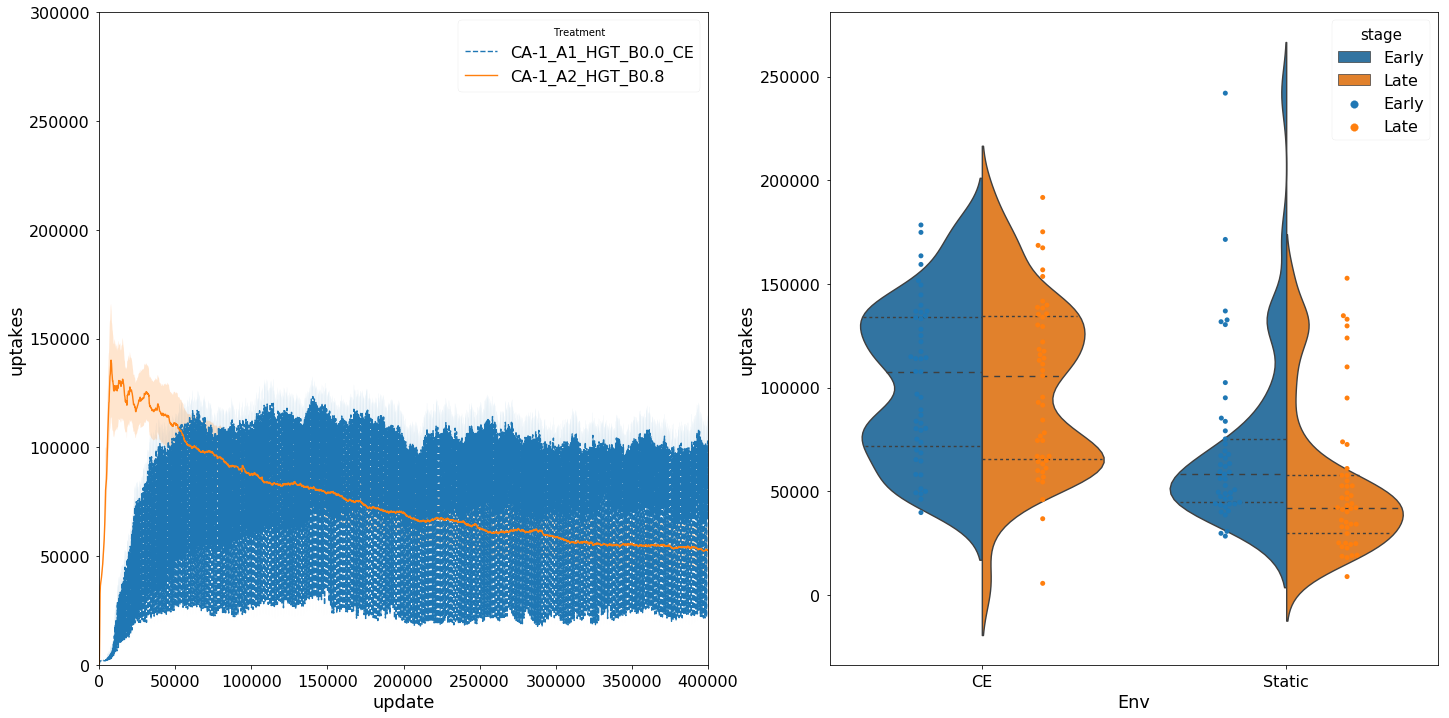

In [35]:
data = hgt_uptakes

## matching HGT use

A1 = data[(data['id'] == 'A1') ]
A2 = data[(data['id'] == "A2") ]

A1['factor'] = ['CE B0.0'] * len(A1)
A2['factor'] = ['Static B0.8'] * len(A2)

A1_A2 = pd.concat([A1, A2])



plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - HGT Fragment Uptake" + "\nFactor: Bonus 0.0 vs Bonus 0.8" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="uptakes",
                unit="replicate", 
                condition="treatment",
                data=A1_A2,
                #color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')
ax.set_ylim([0,300000])



plt.subplot(122)



piece1 = A1_A2.loc[A1_A2['update'] == 200000]
piece1['stage'] = ['Early'] * len(piece1)
piece2 = A1_A2.loc[A1_A2['update'] == 400000]
piece2['stage'] = ['Late'] * len(piece2)

piece = pd.concat([piece1, piece2])

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

ax2 = sns.violinplot(x="Env", y="uptakes", hue='stage', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Env", y="uptakes", hue='stage', 
              data=piece, 
              split=True,
                 )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

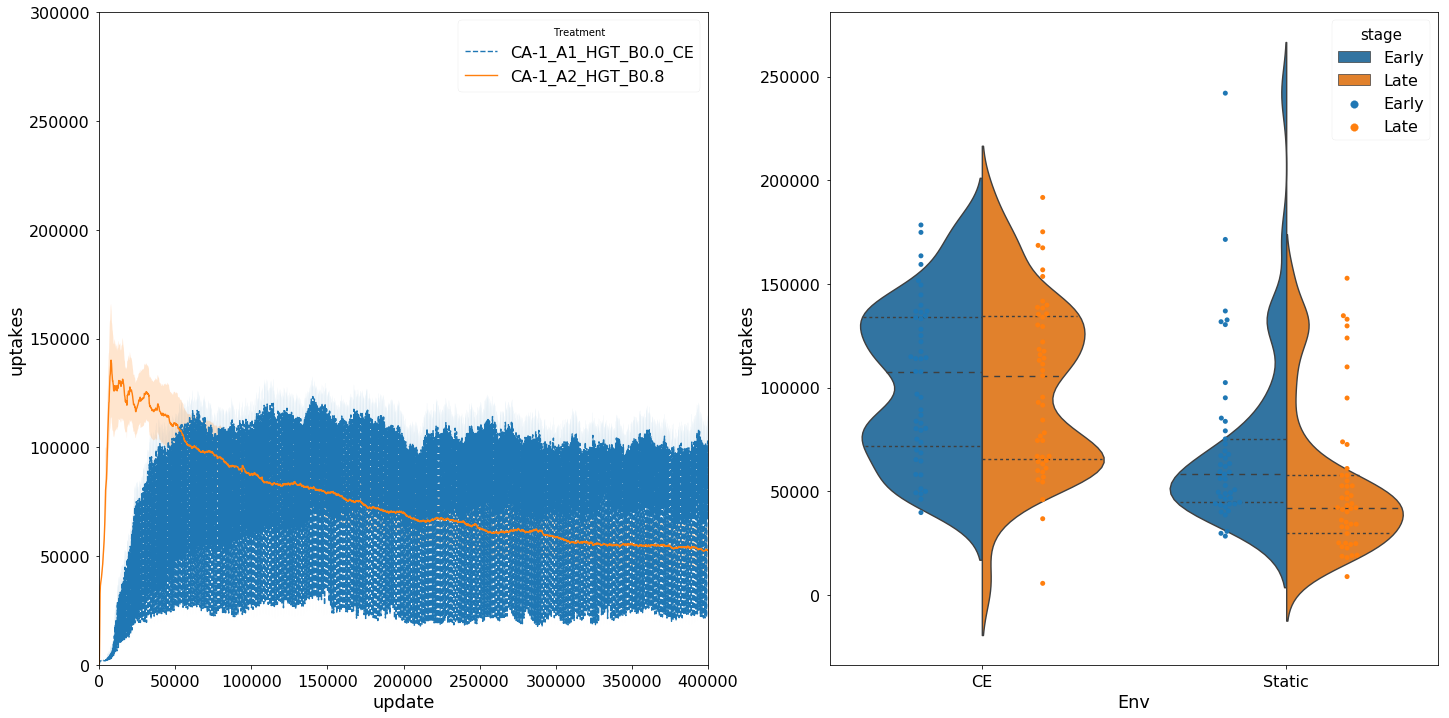

In [35]:
data = hgt_uptakes

## matching HGT use

# A1 = data[(data['id'] == 'A1') ]
# A2 = data[(data['id'] == "A2") ]

# A1['factor'] = ['CE B0.0'] * len(A1)
# A2['factor'] = ['Static B0.8'] * len(A2)

# A1_A2 = pd.concat([A1, A2])

B0 = data [(data['id'] == 'Z1') |
            (data['id'] == "A1") | (data['id'] == 'A5') |
             (data['id'] == "B1") | (data['id'] == 'B5') ]
B0['factor'] = ['0.0'] * len(B0)



plt.rcParams['figure.figsize'] = (24, 12)
plt.title(data_number + " - HGT Fragment Uptake" + "\nFactor: Bonus 0.0 vs Bonus 0.8" + "\n"+data_name)

plt.subplot(121)

ax = sns.tsplot(time="update", value="uptakes",
                unit="replicate", 
                condition="treatment",
                data=A1_A2,
                #color=colors,
                ci=[95])
for line, style in zip(ax.lines, linestyles):
    line.set_linestyle(style)
ax.legend(title='Treatment')
ax.set_ylim([0,300000])



plt.subplot(122)



piece1 = A1_A2.loc[A1_A2['update'] == 200000]
piece1['stage'] = ['Early'] * len(piece1)
piece2 = A1_A2.loc[A1_A2['update'] == 400000]
piece2['stage'] = ['Late'] * len(piece2)

piece = pd.concat([piece1, piece2])

def label_env(row):
    if 'CEq_benign' in row['treatment']:
        return 'CEq_benign'
    elif 'CE_benign' in row['treatment']:
        return 'CE_benign'
    elif 'CEq' in row['treatment']:
        return 'CEq'
    elif 'CE' in row['treatment']:
        return 'CE'
    else:
        return 'Static'
piece['Env'] = piece.apply (lambda row: label_env(row), axis=1)

ax2 = sns.violinplot(x="Env", y="uptakes", hue='stage', 
               data=piece, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Env", y="uptakes", hue='stage', 
              data=piece, 
              split=True,
                 )